In [2]:
import pandas as pd
import datetime
import numpy as np


from sklearn.preprocessing import (
    OneHotEncoder, Binarizer, #KBinsDiscretizer,
    MinMaxScaler#, StandardScaler, PolynomialFeatures
)


from sklearn.cluster import KMeans
import seaborn as sns
from matplotlib import pyplot as plt

In [4]:
df1 = pd.read_csv(r'C:\Users\Aldo.Campos\Documents\Particular\Codenation\codenation\estaticos_portfolio1.csv',index_col=0)
df1['portfolio_1']=1
#df.to_sql('estaticos_portfolio1',connTo,index=False)

In [5]:
df2 = pd.read_csv(r'C:\Users\Aldo.Campos\Documents\Particular\Codenation\codenation\estaticos_portfolio2.csv',index_col=0)
df2['portfolio_2']=2
#df.to_sql('estaticos_portfolio2',connTo,index=False)

In [6]:
df3 = pd.read_csv(r'C:\Users\Aldo.Campos\Documents\Particular\Codenation\codenation\estaticos_portfolio3.csv',index_col=0)
df3['portfolio_3']=3
#df.to_sql('estaticos_portfolio3',connTo,index=False)

In [9]:
df = pd.read_csv(r'C:\Users\Aldo.Campos\Documents\Particular\Codenation\codenation\estaticos_market.csv',index_col=0)


In [10]:
df[df['qt_socios']>1].groupby(['de_natureza_juridica','natureza_juridica_macro'])['id'].count()

de_natureza_juridica                                                    natureza_juridica_macro      
ASSOCIACAO PRIVADA                                                      ENTIDADES SEM FINS LUCRATIVOS     1484
CONSORCIO DE SOCIEDADES                                                 ENTIDADES EMPRESARIAIS             153
COOPERATIVA                                                             ENTIDADES EMPRESARIAIS             892
EMPRESA INDIVIDUAL DE RESPONSABILIDADE LIMITADA DE NATUREZA EMPRESARIA  OUTROS                             239
EMPRESA INDIVIDUAL DE RESPONSABILIDADE LIMITADA DE NATUREZA SIMPLES     OUTROS                               3
EMPRESA PUBLICA                                                         ENTIDADES EMPRESARIAIS             536
EMPRESARIO INDIVIDUAL                                                   OUTROS                               1
FUNDACAO PRIVADA                                                        ENTIDADES SEM FINS LUCRATIVOS      190
ORGANIZACA

In [9]:
df[df['qt_socios']>1]['qt_socios'].mean()

2.9394512346095842

In [11]:
df.loc[(df['qt_socios'].isna()) & (df['de_natureza_juridica']=='EMPRESARIO INDIVIDUAL'),'qt_socios']=1

df.loc[(df['qt_socios']==1) & (df['de_natureza_juridica']=='EMPRESARIO INDIVIDUAL'),'natureza_juridica_macro']='EMPRESARIO INDIVIDUAL'

df.loc[(df['qt_socios']==1) & (df['de_natureza_juridica']=='EMPRESA INDIVIDUAL DE RESPONSABILIDADE LIMITADA DE NATUREZA EMPRESARIA'),'natureza_juridica_macro']='EMPRESARIO INDIVIDUAL'

df.loc[(df['qt_socios']==1) & (df['de_natureza_juridica']=='EMPRESA INDIVIDUAL DE RESPONSABILIDADE LIMITADA DE NATUREZA SIMPLES'),'natureza_juridica_macro']='EMPRESARIO INDIVIDUAL'

In [12]:
df_estimacao_faturamento = df.groupby(['de_ramo','de_natureza_juridica','sg_uf','de_saude_tributaria']).agg({'vl_faturamento_estimado_aux':'mean'}).reset_index()
df_estimacao_faturamento2 = df.groupby(['de_ramo','de_natureza_juridica','sg_uf']).agg({'vl_faturamento_estimado_aux':'mean'}).reset_index()
df_final = df.merge(df_estimacao_faturamento,how='left',on=['de_ramo','de_natureza_juridica','sg_uf','de_saude_tributaria'],suffixes=('','_media'))
df_final['vl_faturamento_estimado_aux_preenchido'] = df_final['vl_faturamento_estimado_aux'].mask(pd.isnull,df_final['vl_faturamento_estimado_aux_media'])

df_final = df_final.merge(df_estimacao_faturamento2,how='left',on=['de_ramo','de_natureza_juridica','sg_uf'],suffixes=('','_media2'))
#df_final['vl_faturamento_estimado_aux_preenchido'] = df_final['vl_faturamento_estimado_aux'].mask(pd.isnull,df_final['vl_faturamento_estimado_aux_media'])
df_final = df_final[['id','sg_uf','qt_filiais', 'fl_rm', 'fl_telefone', 'fl_email', 'fl_st_especial', 
   'idade_empresa_anos', 'de_ramo',
   'de_natureza_juridica', 'fl_matriz', #'dt_situacao',
   'vl_total_veiculos_leves_grupo', 'vl_total_veiculos_pesados_grupo', 'fl_veiculo', 'fl_spa', 'nm_segmento', 
   'nm_divisao', 'setor', 'de_saude_tributaria', 
   'vl_faturamento_estimado_aux',
   'qt_socios', 
   'empsetorcensitariofaixarendapopulacao']]

In [13]:
df_final['qt_socios'] = df_final['qt_socios'].fillna(df[df['qt_socios']>1]['qt_socios'].mean()) 
df_final['empsetorcensitariofaixarendapopulacao'] = df_final['empsetorcensitariofaixarendapopulacao'].fillna(df_final['empsetorcensitariofaixarendapopulacao'].mean())
df_final['vl_faturamento_estimado_aux'] = df_final['vl_faturamento_estimado_aux'].fillna(df_final['vl_faturamento_estimado_aux'].mean())
df_final['vl_total_veiculos_leves_grupo'] = df_final['vl_total_veiculos_leves_grupo'].fillna(df_final['vl_total_veiculos_leves_grupo'].mean())
df_final['vl_total_veiculos_pesados_grupo'] = df_final['vl_total_veiculos_pesados_grupo'].fillna(df_final['vl_total_veiculos_pesados_grupo'].mean())
df_final['de_saude_tributaria'] = df_final['de_saude_tributaria'].fillna('LARANJA')

df_final.loc[(df_final['fl_veiculo'].isna()) & (df_final['vl_total_veiculos_pesados_grupo']>0),'fl_veiculo']=True

df_final['nm_segmento'] = df_final['nm_segmento'].fillna('OUTROS')
df_final['nm_divisao'] = df_final['nm_divisao'].fillna('OUTROS')
df_final['setor'] = df_final['setor'].fillna('OUTROS')

df_final['fl_spa'] = df_final['fl_spa'].fillna(False)

In [14]:

df_final[(df_final['fl_spa'].isna()) ].agg({'id':'count','qt_socios':'mean','vl_total_veiculos_leves_grupo':'mean',
                                              'vl_total_veiculos_pesados_grupo':'mean'})

id                                 0.0
qt_socios                          NaN
vl_total_veiculos_leves_grupo      NaN
vl_total_veiculos_pesados_grupo    NaN
dtype: float64

In [15]:
df_final.groupby(['fl_spa']).agg({'id':'count','qt_socios':'mean','vl_total_veiculos_leves_grupo':'mean',
                                              'vl_total_veiculos_pesados_grupo':'mean'})


,id,qt_socios,vl_total_veiculos_leves_grupo,vl_total_veiculos_pesados_grupo
fl_spa,,,,
False,462018,1.484285,48.707198,3.513619
True,280,3.355629,35.464286,132.596429


In [16]:
le = preprocessing.LabelEncoder()
le.fit(df_final['fl_email'])
le.classes_
df_final['fl_email'] = le.transform(df_final['fl_email'])

le = preprocessing.LabelEncoder()
le.fit(df_final['fl_rm'])
le.classes_
df_final['fl_rm'] = le.transform(df_final['fl_rm'])

le = preprocessing.LabelEncoder()
le.fit(df_final['fl_telefone'])
le.classes_
df_final['fl_telefone'] = le.transform(df_final['fl_telefone'])

le = preprocessing.LabelEncoder()
le.fit(df_final['fl_st_especial'])
le.classes_
df_final['fl_st_especial'] = le.transform(df_final['fl_st_especial'])

le = preprocessing.LabelEncoder()
le.fit(df_final['fl_matriz'])
le.classes_
df_final['fl_matriz'] = le.transform(df_final['fl_matriz'])

le = preprocessing.LabelEncoder()
le.fit(df_final['fl_veiculo'])
le.classes_
df_final['fl_veiculo'] = le.transform(df_final['fl_veiculo'])

le = preprocessing.LabelEncoder()
le.fit(df_final['fl_spa'])
le.classes_
df_final['fl_spa'] = le.transform(df_final['fl_spa'])

df_final.count()

id                                       462298
sg_uf                                    462298
qt_filiais                               462298
fl_rm                                    462298
fl_telefone                              462298
fl_email                                 462298
fl_st_especial                           462298
idade_empresa_anos                       462298
de_ramo                                  462298
de_natureza_juridica                     462298
fl_matriz                                462298
vl_total_veiculos_leves_grupo            462298
vl_total_veiculos_pesados_grupo          462298
fl_veiculo                               462298
fl_spa                                   462298
nm_segmento                              462298
nm_divisao                               462298
setor                                    462298
de_saude_tributaria                      462298
vl_faturamento_estimado_aux              462298
qt_socios                               

In [17]:
one_hot_encoder = OneHotEncoder(sparse=False, dtype=np.int)
course_encoded = one_hot_encoder.fit_transform(df_final[["sg_uf"]])
columns_encoded = one_hot_encoder.categories_[0]

data_encoded = pd.concat([df_final, pd.DataFrame(course_encoded, columns=columns_encoded)], axis=1)

one_hot_encoder = OneHotEncoder(sparse=False, dtype=np.int)
course_encoded = one_hot_encoder.fit_transform(df_final[["setor"]])
columns_encoded = one_hot_encoder.categories_[0]

data_encoded = pd.concat([data_encoded, pd.DataFrame(course_encoded, columns=columns_encoded)], axis=1)


one_hot_encoder = OneHotEncoder(sparse=False, dtype=np.int)
course_encoded = one_hot_encoder.fit_transform(df_final[["de_saude_tributaria"]])
columns_encoded = one_hot_encoder.categories_[0]

data_encoded = pd.concat([data_encoded, pd.DataFrame(course_encoded, columns=columns_encoded)], axis=1)


data_encoded.drop(columns=['sg_uf', 'setor','de_saude_tributaria','de_ramo','de_natureza_juridica','nm_divisao','nm_segmento'],inplace=True)

data_encoded.drop(columns=['vl_total_veiculos_leves_grupo','vl_total_veiculos_pesados_grupo'],inplace=True)


data_encoded.count()

id                                       462298
qt_filiais                               462298
fl_rm                                    462298
fl_telefone                              462298
fl_email                                 462298
fl_st_especial                           462298
idade_empresa_anos                       462298
fl_matriz                                462298
fl_veiculo                               462298
fl_spa                                   462298
vl_faturamento_estimado_aux              462298
qt_socios                                462298
empsetorcensitariofaixarendapopulacao    462298
AC                                       462298
AM                                       462298
MA                                       462298
PI                                       462298
RN                                       462298
RO                                       462298
AGROPECUARIA                             462298
COMERCIO                                

# Normalizar os dados

In [18]:
data_encoded.set_index('id',inplace=True)


In [19]:
scaler = MinMaxScaler(feature_range=(0, 1))
data_encoded_normalized = pd.DataFrame(scaler.fit_transform(data_encoded.values), columns=data_encoded.columns, index=data_encoded.index)
data_encoded_normalized.head(2)

,qt_filiais,fl_rm,fl_telefone,fl_email,fl_st_especial,idade_empresa_anos,fl_matriz,fl_veiculo,fl_spa,vl_faturamento_estimado_aux,...,CONSTRUÇÃO CIVIL,INDUSTRIA,OUTROS,SERVIÇO,AMARELO,AZUL,CINZA,LARANJA,VERDE,VERMELHO
id,,,,,,,,,,,,,,,,,,,,,
a6984c3ae395090e3bee8ad63c3758b110de096d5d819583a784a113726db849,0.0,1.0,1.0,1.0,0.0,0.135704,1.0,0.0,0.0,0.000215,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
6178f41ade1365e44bc2c46654c2c8c0eaae27dcb476c47fdef50b33f4f56f05,0.0,1.0,1.0,1.0,0.0,0.013594,1.0,0.0,0.0,0.000014,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0


# Elbow method

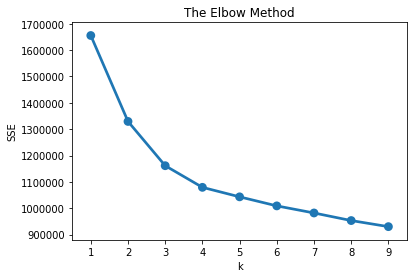

In [40]:
# Definir a quantidade de clusters através do método do cotovelo
import datetime

sse = {}

for k in range(1, 10):
    #print(k)
    #print(datetime.datetime.now())
    kmeans = KMeans(n_clusters=k, random_state=1)
    kmeans.fit(data_encoded_normalized)
    sse[k] = kmeans.inertia_ 
plt.title('The Elbow Method')
plt.xlabel('k'); plt.ylabel('SSE')
sns.pointplot(x=list(sse.keys()), y=list(sse.values()))
plt.show()

In [41]:
k=4

kmeans = KMeans(n_clusters=k, random_state=1).fit(data_encoded_normalized)
data_encoded_normalized['CLUSTER'] = kmeans.labels_

In [42]:
#data_encoded_normalized = data_encoded_normalized.reset_index()
data_encoded_normalized_final = data_encoded_normalized

In [43]:
data_encoded_normalized_final = data_encoded_normalized_final.merge(df1[['id','portfolio_1']],on=['id'],how='left',suffixes=('','_1'))
data_encoded_normalized_final.head(3)

,id,qt_filiais,fl_rm,fl_telefone,fl_email,fl_st_especial,idade_empresa_anos,fl_matriz,fl_veiculo,fl_spa,...,OUTROS,SERVIÇO,AMARELO,AZUL,CINZA,LARANJA,VERDE,VERMELHO,CLUSTER,portfolio_1
0,a6984c3ae395090e3bee8ad63c3758b110de096d5d8195...,0.0,1.0,1.0,1.0,0.0,0.135704,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0,NaN
1,6178f41ade1365e44bc2c46654c2c8c0eaae27dcb476c4...,0.0,1.0,1.0,1.0,0.0,0.013594,1.0,0.0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1,NaN
2,4a7e5069a397f12fdd7fd57111d6dc5d3ba558958efc02...,0.0,1.0,1.0,0.0,0.0,0.066500,1.0,0.0,0.0,...,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,2,NaN


In [44]:
data_encoded_normalized_final = data_encoded_normalized_final.merge(df2[['id','portfolio_2']],on=['id'],how='left',suffixes=('_1','_2'))
data_encoded_normalized_final.head(3)

,id,qt_filiais,fl_rm,fl_telefone,fl_email,fl_st_especial,idade_empresa_anos,fl_matriz,fl_veiculo,fl_spa,...,SERVIÇO,AMARELO,AZUL,CINZA,LARANJA,VERDE,VERMELHO,CLUSTER,portfolio_1,portfolio_2
0,a6984c3ae395090e3bee8ad63c3758b110de096d5d8195...,0.0,1.0,1.0,1.0,0.0,0.135704,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0,NaN,NaN
1,6178f41ade1365e44bc2c46654c2c8c0eaae27dcb476c4...,0.0,1.0,1.0,1.0,0.0,0.013594,1.0,0.0,0.0,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1,NaN,NaN
2,4a7e5069a397f12fdd7fd57111d6dc5d3ba558958efc02...,0.0,1.0,1.0,0.0,0.0,0.066500,1.0,0.0,0.0,...,1.0,1.0,0.0,0.0,0.0,0.0,0.0,2,NaN,NaN


In [45]:
data_encoded_normalized_final = data_encoded_normalized_final.merge(df3[['id','portfolio_3']],on=['id'],how='left',suffixes=('','_3'))
data_encoded_normalized_final.head(3)

,id,qt_filiais,fl_rm,fl_telefone,fl_email,fl_st_especial,idade_empresa_anos,fl_matriz,fl_veiculo,fl_spa,...,AMARELO,AZUL,CINZA,LARANJA,VERDE,VERMELHO,CLUSTER,portfolio_1,portfolio_2,portfolio_3
0,a6984c3ae395090e3bee8ad63c3758b110de096d5d8195...,0.0,1.0,1.0,1.0,0.0,0.135704,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0,NaN,NaN,NaN
1,6178f41ade1365e44bc2c46654c2c8c0eaae27dcb476c4...,0.0,1.0,1.0,1.0,0.0,0.013594,1.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1,NaN,NaN,NaN
2,4a7e5069a397f12fdd7fd57111d6dc5d3ba558958efc02...,0.0,1.0,1.0,0.0,0.0,0.066500,1.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,2,NaN,NaN,NaN


In [46]:
data_encoded_normalized_final.groupby(['CLUSTER'])['id'].count()

CLUSTER
0    116123
1     90613
2    132248
3    123314
Name: id, dtype: int64

In [47]:
data_encoded_normalized_final.groupby(['portfolio_1','CLUSTER'])['id'].count()

portfolio_1  CLUSTER
1.0          0          251
             1            4
             2           31
             3          269
Name: id, dtype: int64

In [48]:
data_encoded_normalized_final.groupby(['portfolio_2','CLUSTER'])['id'].count()

portfolio_2  CLUSTER
2.0          0          130
             1          132
             2          260
             3           44
Name: id, dtype: int64

In [49]:
data_encoded_normalized_final.groupby(['portfolio_3','CLUSTER'])['id'].count()

portfolio_3  CLUSTER
3.0          1          118
             2          147
Name: id, dtype: int64

In [52]:
data_encoded_normalized_final[['id','CLUSTER']].to_csv(r'C:\Users\Aldo.Campos\Documents\Particular\Codenation\codenation\desafio_final\banco_dados.csv')